In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from context import (
    plots,
    plot_utils
)

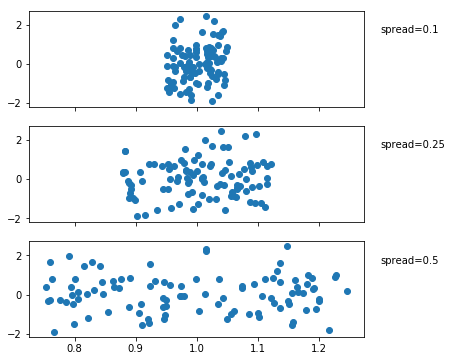

In [2]:
# test spread
def test_jitter_spread():
    y = np.random.normal(size=100)
    
    spreads = [0.1, 0.25, 0.5]
    
    fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
    
    for i, spread in enumerate(spreads):
        xx = plot_utils.jitter(1, 100, spread=spread)
        ax[i].text(1.3, 2, 'spread={}'.format(spread), ha='left', va='top')
        ax[i].scatter(xx, y)
    
    fig.set_size_inches(6,6)

test_jitter_spread()

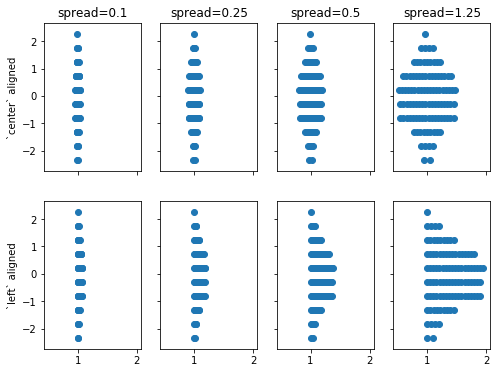

In [3]:
# test bin
def test_bin_spread():
    y = np.random.normal(size=100)

    fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True)
    
    alignments = ['center', 'left']
    spreads = [0.1, 0.25, 0.5, 1.25]
    
    for rr, alignment in enumerate(alignments):
        for cc, spread in enumerate(spreads):
            xx, yy = plot_utils.bin(y, 1, 10, align=alignment, spread=spread)
            ax[rr, cc].scatter(xx, yy)
            
            if rr == 0:
                ax[rr, cc].set_title('spread={}'.format(spread))

    ax[0, 0].set_ylabel('`center` aligned')
    ax[1, 0].set_ylabel('`left` aligned')
    fig.set_size_inches(8,6)

test_bin_spread()

C:\Users\rossm\Anaconda2\envs\courtship\lib\site-packages\pycircstat\descriptive.py:144: UserWarning: Ties detected in median computation
  warnings.warn('Ties detected in median computation')


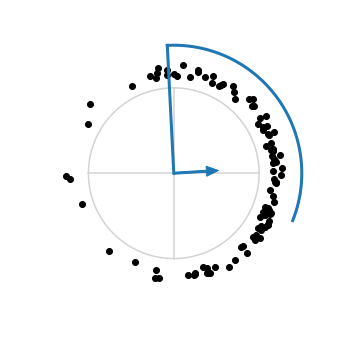

In [4]:
def test_dot_single_group():
    thetas = np.random.normal(size=100)
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    plots.polar_arrow(thetas, color='C0', width=2, headwidth=10, ax=ax, zorder=1)
    plots.polar_dot(thetas, at=1.2, ax=ax,  jitter=0.15, color='k', zorder=2)
    plots.polar_median_error(thetas, ax=ax, at=1.5, linewidth=3, zorder=3)
    plots.format_polar_axes(ax)
    fig.set_size_inches(6,6)
test_dot_single_group()

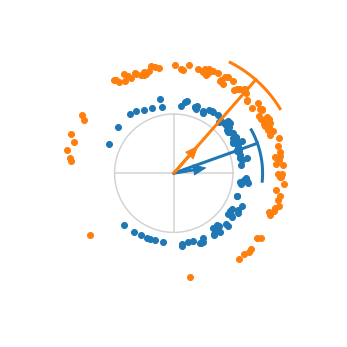

In [5]:
def test_dot_multi_groups():
    thetas1 = np.random.normal(size=100)
    thetas2 = np.random.normal(size=100, loc=np.pi/4)

    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    plots.polar_arrow(thetas1, color='C0', width=2, headwidth=10, ax=ax, zorder=1)
    plots.polar_arrow(thetas2, color='C1', width=2, headwidth=10, ax=ax, zorder=1)

    plots.polar_dot(thetas1, at=1.2, ax=ax,  jitter=0.15, color='C0', zorder=2)
    plots.polar_dot(thetas2, at=1.8, ax=ax,  jitter=0.15, color='C1', zorder=2)

    plots.polar_median_error(thetas1, ax=ax, at=1.5, linewidth=3, color='C0', zorder=3)
    plots.polar_median_error(thetas2, ax=ax, at=2.1, linewidth=3, color='C1', zorder=3)

    plots.format_polar_axes(ax)
    fig.set_size_inches(6,6)
test_dot_multi_groups()

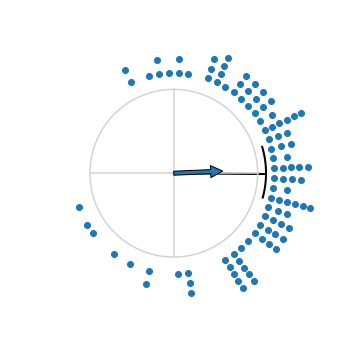

In [6]:
def test_dot_binned_single():
    thetas = np.random.normal(size=100)

    fig, ax = plots.polar_dot_binned(thetas, at=1.2, num_bins=50, spread=2., clip_on=False)
    plots.polar_arrow(thetas, ax=ax)
    plots.polar_median_error(thetas, at=1.1, ax=ax, color='k', linewidth=2)
    plots.format_polar_axes(ax)
    fig.set_size_inches(6,6)
    
test_dot_binned_single()

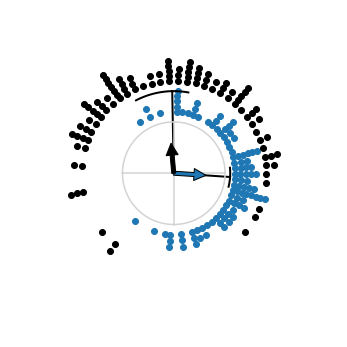

In [7]:
def test_dot_binned_multi():
    thetas1 = np.random.normal(size=100)
    thetas2 = np.random.normal(size=100, loc=np.pi/2)

    fig, ax = plots.polar_dot_binned(thetas1, at=1.2, num_bins=50, spread=2., clip_on=False)
    plots.polar_dot_binned(thetas2, at=1.8, num_bins=50, spread=2., clip_on=False, color='k', ax=ax)
    
    plots.polar_arrow(thetas1, ax=ax)
    plots.polar_arrow(thetas2, ax=ax, color='k')

    plots.polar_median_error(thetas1, at=1.1, ax=ax, color='k', linewidth=2)
    plots.polar_median_error(thetas2, at=1.6, ax=ax, color='k', linewidth=2)
    plots.format_polar_axes(ax)
    fig.set_size_inches(6,6)
    
test_dot_binned_multi()

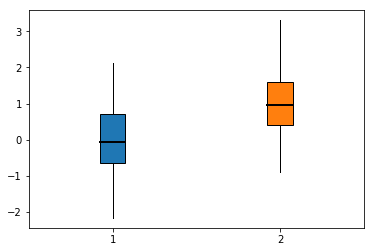

In [8]:
def test_boxplot():
    data = {
        'group1': np.random.normal(size=100).tolist(),
        'group2': np.random.normal(loc=1., size=100).tolist()
    }
    fig, ax = plt.subplots()
    plots.boxplot(
        data,
        order=['group1', 'group2'],
        colors=None,
        ax=ax
    )
test_boxplot()

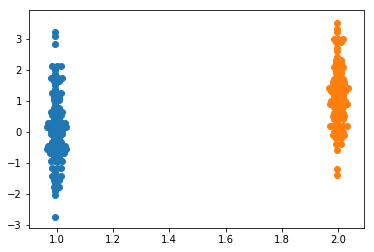

In [9]:
def test_striphist():
    data = {
        'group1': np.random.normal(size=100).tolist(),
        'group2': np.random.normal(loc=1., size=100).tolist()
    }
    fig, ax = plt.subplots()
    plots.striphist(
        data,
        order=['group1', 'group2'],
        markerfacecolors=None,
        markeredgecolors=None,
        ax=ax
    )
test_striphist()

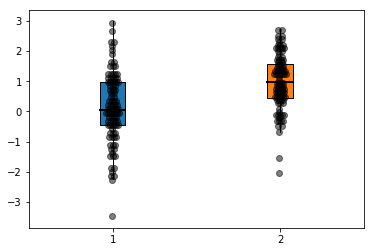

In [10]:
def test_box_plus_strip():
    data = {
        'group1': np.random.normal(size=100).tolist(),
        'group2': np.random.normal(loc=1., size=100).tolist()
    }
    fig, ax = plt.subplots()
    plots.boxplot(
        data, order=['group1', 'group2'],
        ax=ax,
        at=[1,2],
        zorder=1
    )
    plots.striphist(
        data, order=['group1', 'group2'],
        markerfacecolors=['k', 'k'],
        markeredgecolors=['k', 'k'],
        ax=ax,
        at=[1,2],
        zorder=2,
        alpha=0.5
    )
test_box_plus_strip()

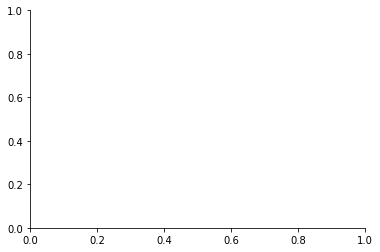

In [11]:
def test_format_categorical_axes():
    fig, ax = plt.subplots()
    plots.format_categorical_axes(ax)

test_format_categorical_axes()